# Teste de hipótese

In [2]:
# Import standard packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns

# extraindo data set e printando os 5 primeiros e 5 ultimos dados junto com as dimensoes
matches_info_df = pd.read_csv("https://raw.githubusercontent.com/gabrielaragao01/Data-Science-Project/main/code/first-steps/matches_info_df.csv", index_col=0)
matches_info_df

,result,performance_rank_home,home_team_name,B365H,B365D,B365A,away_team_name,away_performance_rank,Pre-Match PPG (Home),Pre-Match PPG (Away),...,referee,home_team_yellow_cards,home_team_red_cards,away_team_yellow_cards,away_team_red_cards,home_team_fouls,away_team_fouls,dirty,home_team_possession,odds_btts_yes
0,1,6,Manchester United,1.57,3.90,7.50,Leicester City,9,0.00,0.00,...,Andre Marriner,2,0,1,0,11,8,1,46,2.05
1,-1,13,Newcastle United,3.90,3.50,2.04,Tottenham Hotspur,4,0.00,0.00,...,Martin Atkinson,2,0,2,0,11,12,0,40,1.83
2,2,14,AFC Bournemouth,1.90,3.60,4.50,Cardiff City,18,0.00,0.00,...,Kevin Friend,1,0,1,0,11,9,0,62,1.83
3,-2,19,Fulham,2.50,3.40,3.00,Crystal Palace,12,0.00,0.00,...,Mike Dean,1,0,2,0,9,11,0,66,1.71
4,-3,20,Huddersfield Town,6.50,4.00,1.61,Chelsea,3,0.00,0.00,...,Chris Kavanagh,2,0,1,0,9,8,0,37,2.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,Liverpool,1.30,6.00,11.00,Wolverhampton Wanderers,7,2.78,1.28,...,Martin Atkinson,0,0,2,0,3,11,0,59,1.95
376,-2,6,Manchester United,1.28,6.50,11.00,Cardiff City,18,2.00,0.61,...,Jonathan Moss,3,0,3,0,9,6,0,73,1.74
377,0,16,Southampton,1.44,4.75,8.50,Huddersfield Town,20,1.22,0.33,...,Lee Probert,0,0,1,0,8,6,0,53,1.80
378,0,4,Tottenham Hotspur,2.20,3.50,3.50,Everton,8,2.06,1.06,...,Andre Marriner,0,0,2,0,10,13,1,55,1.59


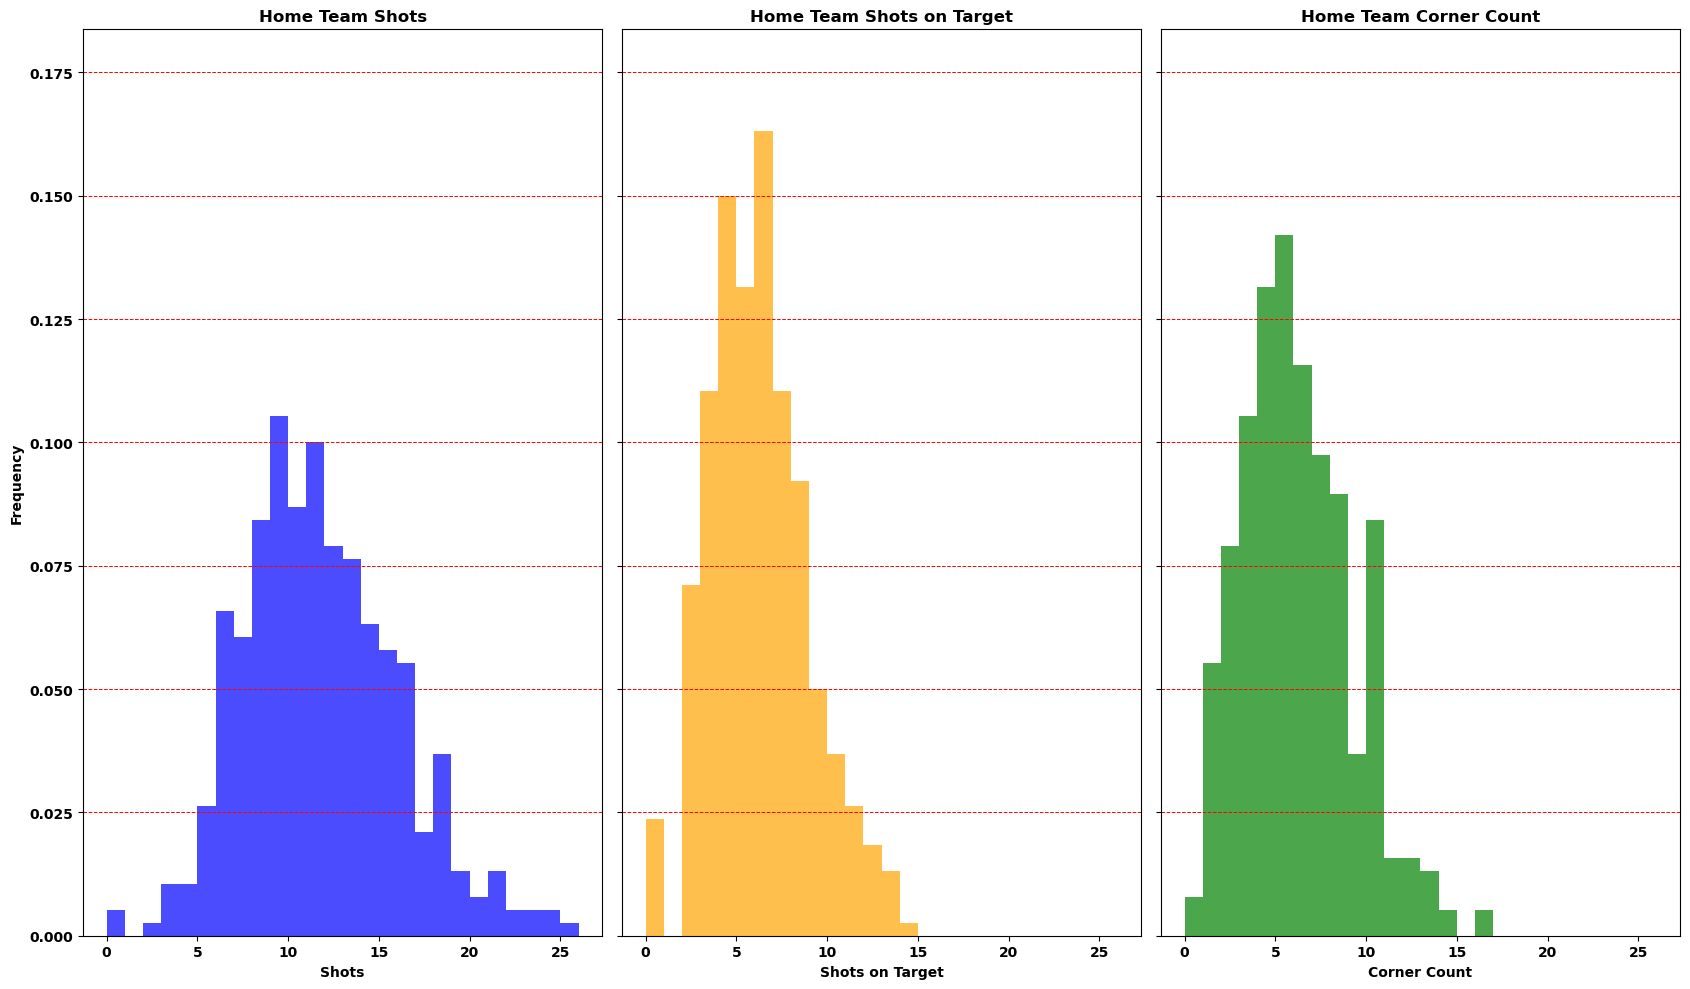

In [3]:
# Extração dos dados relevantes
general_shots = matches_info_df['home_team_shots']
shots_on_target = matches_info_df['home_team_shots_on_target_original']
home_team_corner_count = matches_info_df['home_team_corner_count']

# Criação dos plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(17, 10))

# Plot do histograma de general_shots
ax1.hist(general_shots, bins=int(general_shots.max()), color='blue', alpha=0.7, density=True)
ax1.set_title('Home Team Shots')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Frequency')

# Adição das linhas tracejadas vermelhas
for y in [0.025, 0.050, 0.075, 0.1, 0.125, 0.15, 0.175]:
    ax1.axhline(y=y, color='red', linestyle='--', linewidth=0.7)
    ax2.axhline(y=y, color='red', linestyle='--', linewidth=0.7)
    ax3.axhline(y=y, color='red', linestyle='--', linewidth=0.7)

# Plot do histograma de shots_on_target
ax2.hist(shots_on_target, bins=int(shots_on_target.max()), color='orange', alpha=0.7, density=True)
ax2.set_title('Home Team Shots on Target')
ax2.set_xlabel('Shots on Target')

# Plot do histograma de home_team_corner_count
ax3.hist(home_team_corner_count, bins=int(home_team_corner_count.max()), color='green', alpha=0.7, density=True)
ax3.set_title('Home Team Corner Count')
ax3.set_xlabel('Corner Count')

# Ajuste do layout
plt.tight_layout()
plt.show()


## Verificando a distribuição no histograma as distribuiçoes parecem seguir uma normal, vamos verificar...


## Teste de Hipótese

Para avaliar se os dados das variáveis `general_shots`, `shots_on_target` e `home_team_corner_count` seguem uma distribuição normal, realizamos o teste de normalidade de Shapiro-Wilk.

Com um nível de significância de 0.05, caso o valor-p seja maior que esse limite, não rejeitamos a hipótese nula (H0) de que os dados seguem uma distribuição normal. Caso contrário, rejeitamos a H0 e concluímos que os dados não seguem uma distribuição normal.


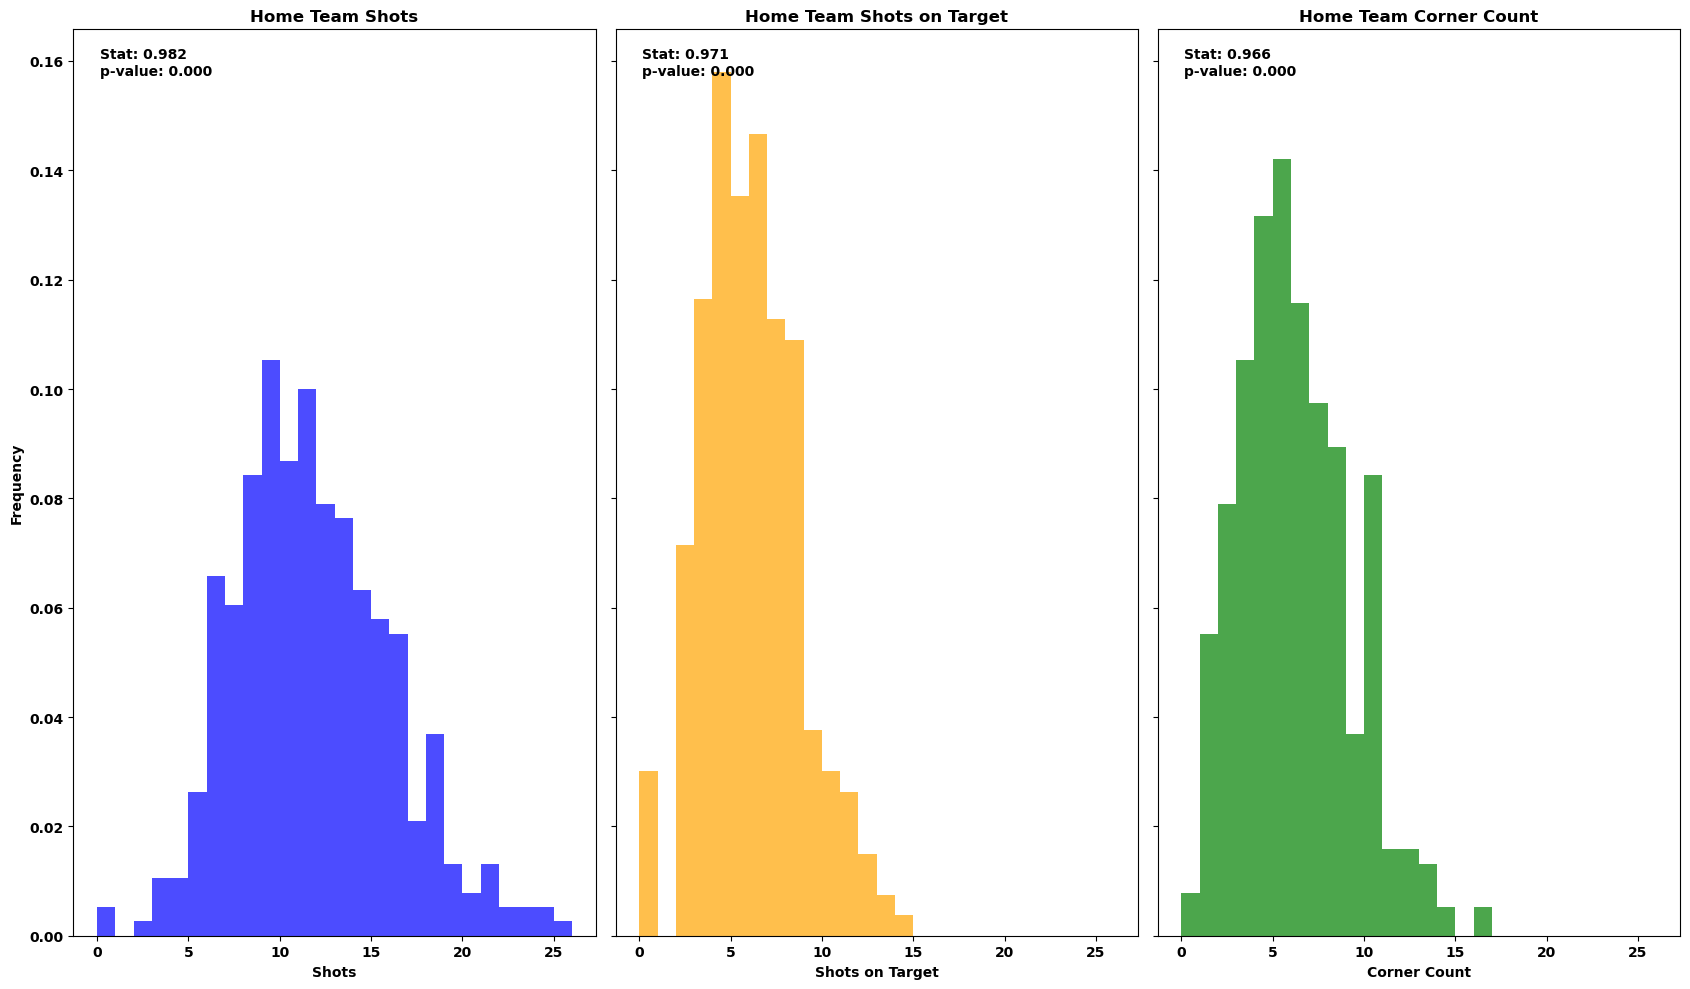

In [4]:
# Extração dos dados relevantes
general_shots = matches_info_df['home_team_shots']
shots_on_target = matches_info_df['home_team_shots_on_target_dirty']
home_team_corner_count = matches_info_df['home_team_corner_count']

# Criação dos plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True, figsize=(17, 10))

# Plot do histograma de general_shots
ax1.hist(general_shots, bins=int(general_shots.max()), color='blue', alpha=0.7, density=True)
ax1.set_title('Home Team Shots')
ax1.set_xlabel('Shots')
ax1.set_ylabel('Frequency')

# Teste de normalidade de Shapiro-Wilk
stat, p = stats.shapiro(general_shots)
ax1.text(0.05, 0.95, f'Stat: {stat:.3f}\np-value: {p:.3f}', transform=ax1.transAxes)

# Plot do histograma de shots_on_target
ax2.hist(shots_on_target, bins=int(shots_on_target.max()), color='orange', alpha=0.7, density=True)
ax2.set_title('Home Team Shots on Target')
ax2.set_xlabel('Shots on Target')

# Teste de normalidade de Shapiro-Wilk
stat, p = stats.shapiro(shots_on_target.dropna())
ax2.text(0.05, 0.95, f'Stat: {stat:.3f}\np-value: {p:.3f}', transform=ax2.transAxes)


# Plot do histograma de home_team_corner_count
ax3.hist(home_team_corner_count, bins=int(home_team_corner_count.max()), color='green', alpha=0.7, density=True)
ax3.set_title('Home Team Corner Count')
ax3.set_xlabel('Corner Count')

# Teste de normalidade de Shapiro-Wilk
stat, p = stats.shapiro(home_team_corner_count)
ax3.text(0.05, 0.95, f'Stat: {stat:.3f}\np-value: {p:.3f}', transform=ax3.transAxes)

# Ajuste do layout
plt.tight_layout()
plt.show()

In [5]:
from scipy.stats import shapiro

# home_team_corner_count é o seu conjunto de dados
statistic, p_value = shapiro(home_team_corner_count)

# Imprimir os resultados
print("Estatística do teste:", statistic)
print("Valor-p:", p_value)

# Definir um nível de significância
alpha = 0.05

# Verificar se os dados seguem uma distribuição normal
if p_value > alpha:
    print("Não rejeitar H0: Os dados parecem seguir uma distribuição normal.")
else:
    print("Rejeitar H0: Os dados seguem uma distribuição normal.")
home_team_corner_count

Estatística do teste: 0.9655566231080712
Valor-p: 8.443535957510466e-08
Rejeitar H0: Os dados seguem uma distribuição normal.


0       2
1       3
2       7
3       5
4       2
       ..
375     4
376    11
377     4
378     7
379     7
Name: home_team_corner_count, Length: 380, dtype: int64

Após realizar o teste de normalidade de Shapiro-Wilk para os dados das variáveis general_shots, shots_on_target e home_team_corner_count, concluímos que é necessário rejeitar a hipótese nula (H0) de que os dados seguem uma distribuição normal. Isso se deve ao fato de que os valores-p obtidos foram significativamente baixos, indicando uma forte evidência contra a normalidade dos dados. Com base em um nível de significância de 0.05, os valores-p obtidos foram inferiores a esse limite, levando à rejeição da hipótese nula em favor da hipótese alternativa. Esses resultados sugerem que os dados das variáveis analisadas não seguem uma distribuição normal.



- **`general_shots`**: Esta variável representa o número total de chutes feitos pelo time da casa durante as partidas. É uma medida do ataque e das tentativas de marcar gols.

- **`shots_on_target`**: Esta variável indica o número de chutes que foram na direção do gol (ou seja, "chutes no alvo") pelo time da casa. É uma medida mais precisa da eficácia do ataque, pois apenas chutes que podem resultar em gols são considerados.

- **`home_team_corner_count`**: Esta variável representa o número de cantos conquistados pelo time da casa durante as partidas. Cantos podem ser oportunidades de marcar gols, especialmente se o time tiver bons jogadores na área adversária ou uma estratégia específica para cobranças de cantos.

Essas variáveis são medidas independentes uma da outra, pois representam diferentes aspectos do desempenho de um time em partidas de futebol. Portanto, o teste de normalidade de Shapiro-Wilk aplicado a cada uma delas é considerado não pareado, pois não há uma relação específica entre os conjuntos de dados das diferentes variáveis.

Como rejeitamos assumimos que a distribuição nao segue uma normal, entao essas variaveis sao não parametricas

Dessa forma, iremos usar o teste de Kruskal-Wallis justamente pelas variaveis seram não parametricas e independentes

#### Análise para comparar a similaridade entre os chutes do time da casa (home_team_shots), chutes no gol (home_team_shots_on_target_original) e número de escanteios (home_team_corner_count).

Teste de Hipótese sobre a Relação entre Chutes, Chutes no Gol e Escanteios

Hipótese Nula (H0): Não há relação linear significativa entre o número de chutes, chutes no gol e escanteios.

Hipótese Alternativa (H1): Existe uma relação linear significativa entre o número de chutes, chutes no gol e escanteios.

Se o p-valor > 0.05: Aceitamos a hipótese nula (H0), indicando que não há evidência estatística suficiente para afirmar que existe uma relação linear significativa entre o número de chutes, chutes no gol e escanteios.

Se o p-valor < 0.05: Rejeitamos a hipótese nula (H0) e aceitamos a hipótese alternativa (H1), sugerindo que existe uma relação linear significativa entre o número de chutes, chutes no gol e escanteios.

Para realizar um teste de hipótese sobre a relação linear entre 3 variáveis, como o número de chutes, chutes no gol e escanteios. Nós utilizamos o teste Kruskal-Wallis. Pois ele é adequado para comparar se há diferenças significativas entre as distribuições nao parametricas e idependentes.

In [6]:
from scipy.stats import kruskal

# Extração dos dados relevantes
general_shots = matches_info_df['home_team_shots']
shots_on_target = matches_info_df['home_team_shots_on_target_original']
home_team_corner_count = matches_info_df['home_team_corner_count']

# Realizar o teste de Kruskal-Wallis
statistic, p_value = kruskal(general_shots, shots_on_target, home_team_corner_count)

# Exibir os resultados
print(f"Kruskal-Wallis H-statistic: {statistic}")
print(f"P-value: {p_value}")

# Interpretação dos Resultados
if p_value < 0.05:
    print("Rejeitamos a hipótese nula: Há uma diferença significativa entre as distribuições.")
else:
    print("Não rejeitamos a hipótese nula: Não há uma diferença significativa entre as distribuições.")


Kruskal-Wallis H-statistic: 410.4305982436649
P-value: 7.518444345648133e-90
Rejeitamos a hipótese nula: Há uma diferença significativa entre as distribuições.


## Hipotese nula rejeitada, Hipotese alternativa Aceita

O resultado do teste de Kruskal-Wallis mostra que a estatística H é 410.4306 e o p-valor é extremamente pequeno (aproximadamente 
7.52
×
1
0
−
90
7.52×10 
−90
 ). Com um p-valor tão pequeno, rejeitamos a hipótese nula, indicando que há uma diferença significativa entre as distribuições de chutes, chutes no gol e contagem de escanteios do time da casa.